In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Bias_correction_ucl.csv',parse_dates=['Date'])

In [3]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [7]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [8]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
data.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [10]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year



In [11]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [12]:
data.drop(['Date'],axis=1,inplace=True)

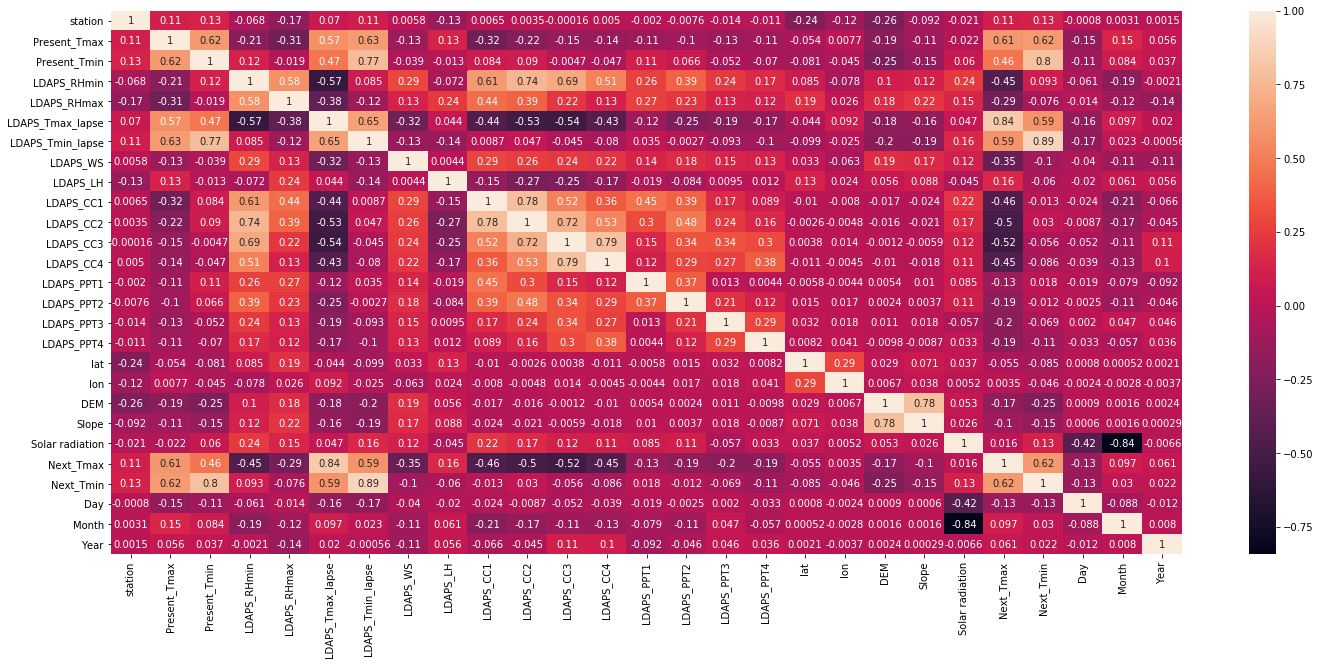

In [13]:
#Plotting the correlation -Relationship and sex are highly negatively correlated
plt.figure(figsize=(24,10))
sns.heatmap(data.corr(),annot=True)

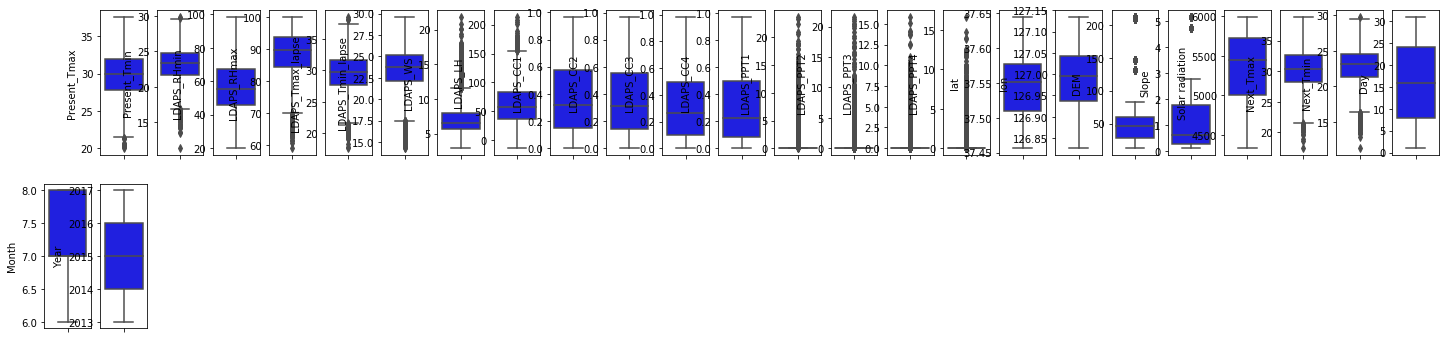

In [14]:
#Outlier detection
collist=data.columns.values
ncol=25
nrow=8
plt.figure(figsize=(ncol,ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')
    

In [15]:
# As per the above box plot, outliers are present in the data, hence removing using zscore
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
print(data.shape)
data=data.loc[(z_sc<3).all(axis=1)]
print(data.shape)

(7588, 27)
(6739, 27)


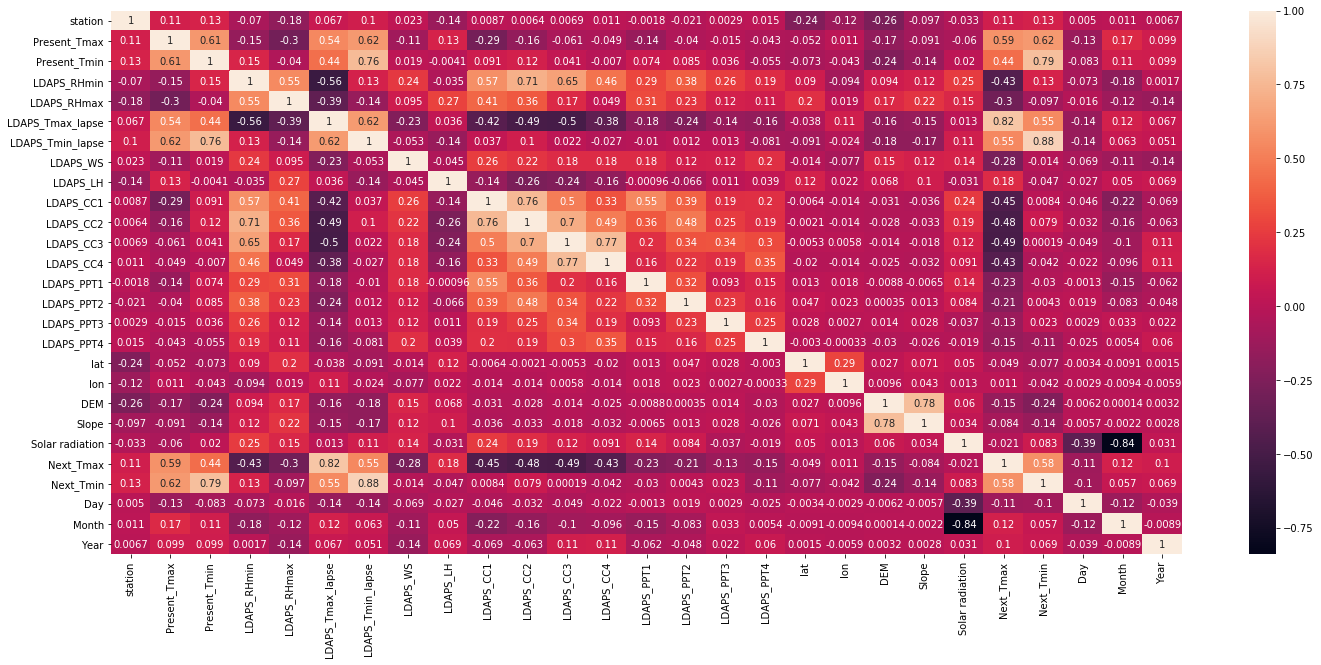

In [16]:
#Plotting the correlation -Relationship and sex are highly negatively correlated
plt.figure(figsize=(24,10))
sns.heatmap(data.corr(),annot=True)

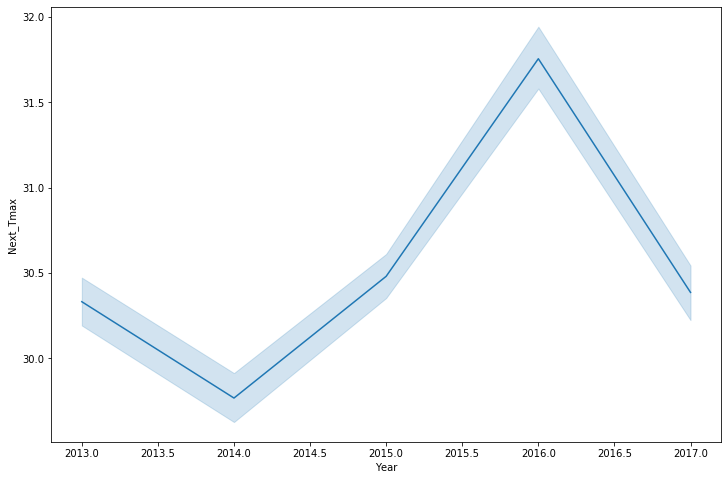

In [17]:
#Graphical Representation
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Next_Tmax',data=data)

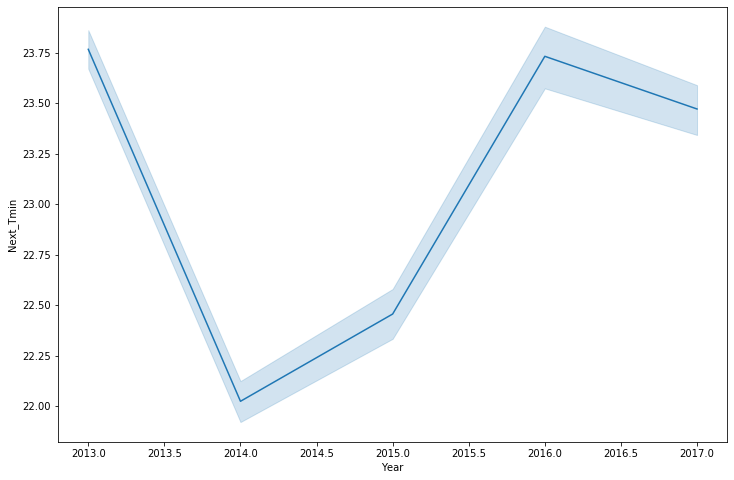

In [18]:
#Graphical Representation
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Next_Tmin',data=data)

In [19]:
data.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
dtype: float64

In [20]:
for i in data.columns:
    if data[i].skew()>0.5:
        data[i]=np.log1p(data[i])

In [21]:
data.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.616039
LDAPS_CC1           0.329077
LDAPS_CC2           0.246509
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
dtype: float64

In [22]:
data.shape

(6739, 27)

In [23]:
data.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [24]:
data.dropna(axis=0,inplace=True)

In [25]:
x=data.iloc[:,:]
y=data.iloc[:,22:23]
y2=data.iloc[:,23:24]
print(y)
print(y2)

      Next_Tmax
0          29.1
1          30.5
2          31.1
3          31.7
4          31.2
...         ...
7745       27.6
7746       28.0
7747       28.3
7748       28.6
7749       27.8

[6738 rows x 1 columns]
      Next_Tmin
0          21.2
1          22.5
2          23.9
3          24.3
4          22.5
...         ...
7745       17.7
7746       17.1
7747       18.1
7748       18.8
7749       17.4

[6738 rows x 1 columns]


In [26]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.210218,...,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.203356,...,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.190078,...,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.195873,...,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.140985,...,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.051550,...,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.064346,...,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.029592,...,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035245,...,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,18.8,30,8,2017


In [27]:
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)

In [28]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.210218,...,0.0,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.203356,...,0.0,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.190078,...,0.0,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.195873,...,0.0,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.140985,...,0.0,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.051550,...,0.0,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.064346,...,0.0,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.029592,...,0.0,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035245,...,0.0,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,30,8,2017


In [29]:
#x.dropna(axis=0,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 84 is 0.7845110760819121


84

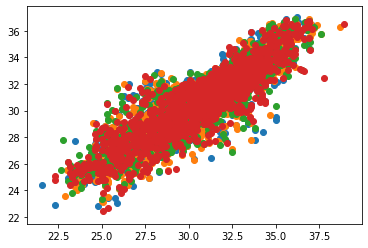

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x,y)

Maximum r2 score corresponding to random state 45 is 0.6553201958547984


45

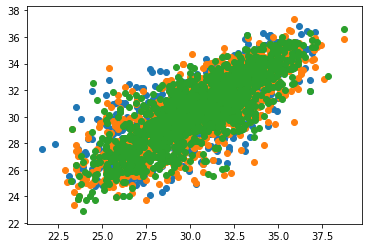

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r2scoref(knr,x,y)

Maximum r2 score corresponding to random state 84 is 0.7845000956527403


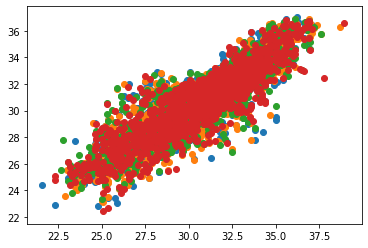

In [33]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.0001)
r_state=r2scoref(lso,x,y)

In [34]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for KNR regression is:',cross_val_score(lso,x,y,cv=10,scoring="r2").mean())
print('Standard Deviation for KNR regression is :',cross_val_score(lso,x,y,cv=5,scoring="r2").std())

Mean r2_score for KNR regression is: 0.6395818187635941
Standard Deviation for KNR regression is : 0.06129665306027864


In [36]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(x,y)
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 50,
 'n_estimators': 200,
 'num_leaves': 300}

Maximum r2 score corresponding to random state 55 is 0.9371775768738239


55

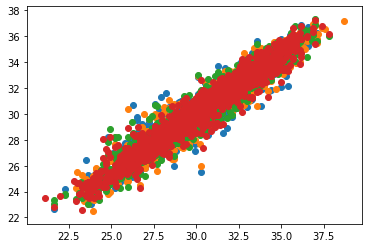

In [39]:
lg = lgb.LGBMRegressor(learning_rate=0.05,max_depth=50,n_estimators=200,num_leaves=300)
r2scoref(lg,x,y)

In [40]:
#lgbm model has the best parameters, hence it is deployed
from sklearn.externals import joblib
joblib.dump(lg,'covid_case_prediction.pkl')

['covid_case_prediction.pkl']